## BDF-Verfahren

Die BDF-Verfahren (**b**ackward **d**ifferential **f**ormula) sind implizite lineare Mehrschrittverfahren zur numerischen Lösung von Anfangswertproblemen gewöhnlicher Differentialgleichungen. 


#### Ansatz 

Die Grundidee bei BDF-Verfahren die numerische Differentiation.

\begin{align*}
\sum_{l=0}^k a_l y^{j+l} =  h f(t_{j+k}, y^{j+k}) , \quad \text{also}
\quad
&\underbrace{\frac{\sum_{l=0}^k a_l y^{j+l}}{h} } =   f(t_{j+k}, y^{j+k})\\
& \approx y^\prime(t_{j+k}) =   f\big( t_{j+k}, y(t_{j+k}) \big)
\end{align*}

Die Differentialgleichung wird mit Hilfe von zurückliegenden Funktionswerten approximiert. Diese speziellen impliziten k-Schrittverfahren können direkt aus durch numerische Differentiation, d.h. finite Differenzen Formeln hergeleitet werden.
Sie sind allgemein durch $b_k = 1$, $b_0 = b_1 = \cdots = b_{k-1} = 0$ charakterisiert und besitzen die Ordnung p = k [1]. Eine Herleitung geeigneter Koeffizienten $a_l$ erfolgt durch numerische Differentiation, d.h. finite Differenzen Formeln. Diese ergeben sich durch die Ableitung eines Inpterpolationspolynoms $q(t)$ statt der unbekannten Funktion $y(t)$. 


---


### Berechnung der Koeffizienten für  BDF2:
Für $k=2$ ergibt sich:

\begin{align*}
q(t) &= y^j L_0(t) + y^{j+1} L_1(t) + y^{j+2} L_2 (t) \\
q^\prime(t_{j+2}) &= y^j \underbrace{L^\prime_0(t_{j+2})}_{a_0/h} 
+ y^{j+1} \underbrace{L^\prime_1(t_{j+2})}_{a_1 / h} 
+ y^{j+2} \underbrace{L^\prime_2 (t_{j+2})}_{a_2/ h}
\end{align*}

mit 

\begin{align*}
L_0(t) &= \frac{ (t - t_{j+1}) (t - t_{j+2}) }{ (t_j - t_{j+1}) (t_j - t_{j+2}) } = \frac{ (t - t_{j+1}) (t - t_{j+2}) }{ 2 h^2 } \\
L^\prime_0(t) &= \frac{ (t - t_{j+1})  }{ 2 h^2 } + \frac{ (t - t_{j+2})  }{ 2 h^2 } \\
L^\prime_0(t_{j+2}) &= \frac{ (t_{j+2} - t_{j+1})  }{ 2 h^2 } + 0 =  \frac{h}{2 h^2} = \underbrace{\frac{1}{2}}_{ = a_0} \frac{1}{h}
\end{align*}


\begin{align*}
L_1(t) &= \frac{ (t - t_{j}) (t - t_{j+2}) }{ (t_{j+1} - t_{j}) (t_{j+1} - t_{j+2}) } = \frac{ (t - t_{j+1}) (t - t_{j+2}) }{ - h^2 } \\
L^\prime_1(t) &= \frac{ (t - t_{j})  }{ - h^2 } + \frac{ (t - t_{j+2})  }{ - h^2 } \\
L^\prime_1(t_{j+2}) &= \frac{ (t_{j+2} - t_{j})  }{ - h^2 } + 0 =  \frac{2 h}{- h^2} = \underbrace{-2}_{ = a_1} \frac{1}{h}
\end{align*}

\begin{align*}
L_2(t) &= \frac{ (t - t_{j}) (t - t_{j+1}) }{ (t_{j+2} - t_{j}) (t_{j+2} - t_{j+1}) } = \frac{ (t - t_{j+1}) (t - t_{j+1}) }{ 2 h^2 } \\
L^\prime_2(t) &= \frac{ (t - t_{j})  }{ 2 h^2 } + \frac{ (t - t_{j+1})  }{ 2 h^2 } \\
L^\prime_2(t_{j+2}) &= \frac{ (t_{j+2} - t_{j})  }{ 2 h^2 } + \frac{ (t_{j+2} - t_{j+1})  }{ 2 h^2 } =  \frac{3 h}{2 h^2} = \underbrace{\frac{3 }{2}}_{ = a_2} \frac{1}{h}
\end{align*}

Damit ergibt sich:

$$
q^\prime(t_{j+2}) = \big( \frac{1}{2} y^j - 2 y^{j+1} + \frac{3}{2} y^{j+2} \big) / h.
$$

Also ist $a_0 = 1/2$, $a_1 = -2$, $a_2 = 3/2$ und die BDF2-Verfahrensvorschrift lautet:

$$
\boxed{
\frac{1}{2} y^j - 2 y^{j+1} + \frac{3}{2} y^{j+2} = hf(t_{j+2}, y^{j+2})
}
$$

Damit ist die in jedem Zeitschritt zu lösende Nullstellenproblem lautet:
$$
\frac{1}{2} y^j - 2 y^{j+1} + \frac{3}{2} y^{j+2} - hf(t_{j+2}, y^{j+2}) = 0
$$

---

In [8]:
import numpy as np
import odesolver as ode
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Fehler')

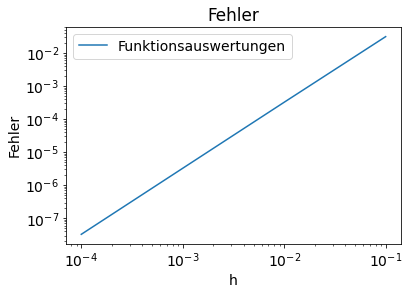

In [15]:
# Konvergenz-Analyse 
lamb = 1.
K    = 10
y0 = np.array([0.1])    # Anfangswert
t0 = 0.                 # Anfangszeitpunkt
tf = 10.                # Endzeitpunkt
t_span = [t0, tf]       # Zeitintervall

def f_logistic(t, y):
    return lamb*(1. - y/K)*y
def y_log(t, t0, y0):
    return y0*np.exp(lamb*(t-t0))/((1. - y0/K) + y0*np.exp(lamb*(t-t0))/K)
def jac(t, y):
    return (1. - y / 5)

m = 4
h_arr = 1/10**(np.arange(m) + 1)         # Schrittweite
Ei = np.zeros(len(h_arr))                # globale Fehler

for k in range(len(h_arr)):
    N = int( (tf - t0)/h_arr[k] )
    tk = np.linspace(t0, tf, N + 1)  # an diesen Zeitpunkten soll die Loesung berechnet werden
    solution = ode.bdf2(f_logistic, t_span, y0, tk, jac)
    yk_exakt = y_log(solution.t, t0, y0)           # Berechnung der Loesungswerte an den Gitterpunken
    yk       = solution.y
    Ei[k]    = np.linalg.norm( yk[0,:] - yk_exakt, np.inf)

plt.plot(h_arr, Ei, '-', label = r'Funktionsauswertungen')
plt.xlabel('h')
plt.ylabel('Fehler')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('Fehler')

Wir haben die globale Fehler von BDF(2)-Verfahren bei logistischen DGL für verschiedene Schrittweiten $h$ betrachtet. Die Konvergenz-Ordnung von 2 ist bei Grafik zu erkennen.

### Anwendungsbeispiel: Van der Pol Oszillator
Betrachten wir das folgende Anfangswertproblem, der sogenannte *Van der Pol-Oszillator*, ist eines der klassischen Testbeispiele für numerische Lösungsverfahren von steifen Problemen 

\begin{equation*}
	y^{\prime\prime} = \mu(1-y^2)y^\prime - y, \quad t \in [0,T], \quad y(0) = 2, \quad y^\prime(0) = 0.
\end{equation*}

Dieser nichtlineare Oszillator hat dynamisch sehr interessante Eigenschaften, die von dem Wert des Parameters $\mu$ abhängen. Er wurde z.B. zur Modellierung von oszillierenden biologischen Systemen (Herzschläge, Neuronen im Gehirn) verwendet. Testen wir das Verhalten für $\mu > 0$ und unterschiedliche Anfangswerte.



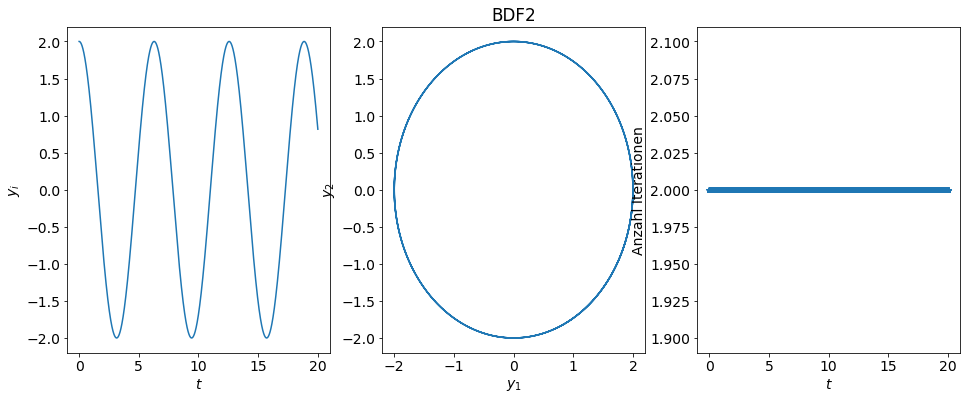

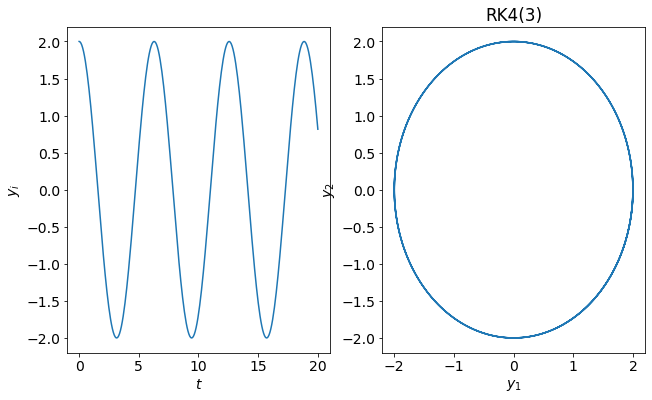

In [2]:
ode.plot_vanderpol_oszillator(0,20)

Für $\mu = 0$ erhält man den harmonischen Oszillator (linear, rein komplexe Eigenwerte). Hier haben BDF-2 und der Runge-Kutta-Verfahren 4(3) keine Probleme zu lösen.

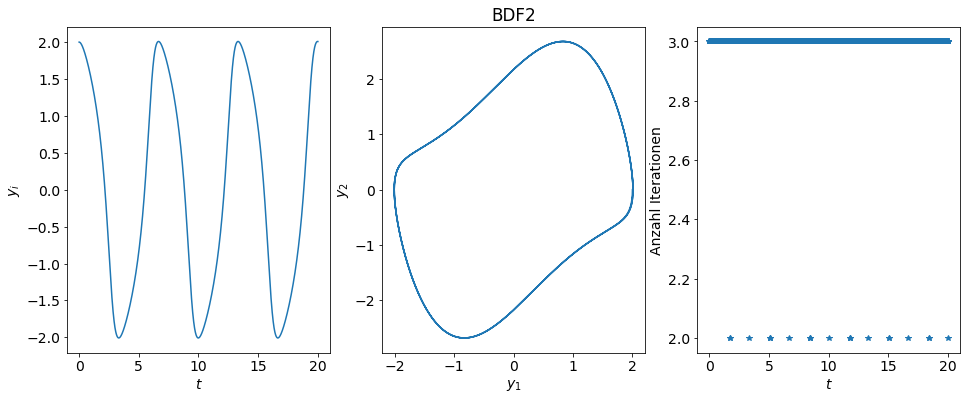

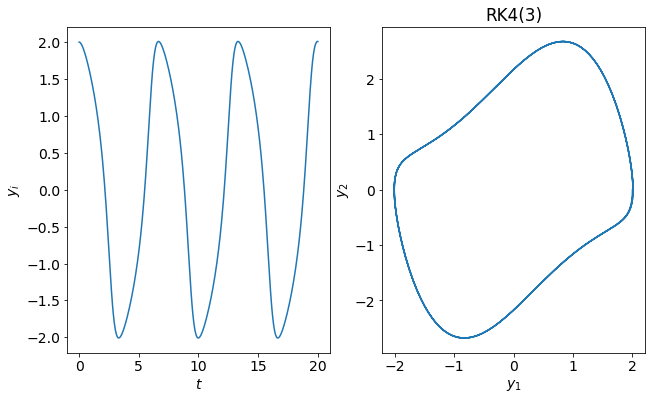

In [3]:
ode.plot_vanderpol_oszillator(1,20)

Für moderate Größen $\mu \sim 1$ ist das Problem nicht steif, daher haben BDF-2 und der Runge-Kutta-Verfahren 4(3) wie erwartet keine Probleme zu lösen.

C:\Users\Smart\Downloads\num3_21\projekt2\odesolver.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  h_opt =   h*(rho*tol/fehler)**(1/4)      # Schrittweitenvorschlag # Ordung von RK p=3


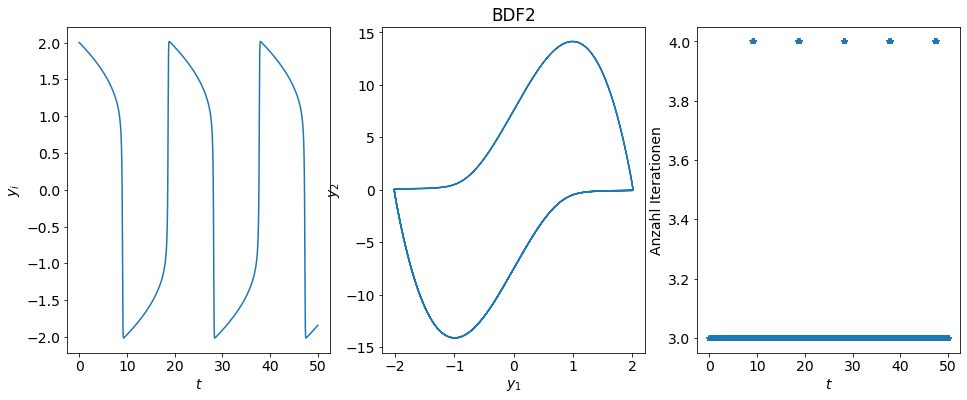

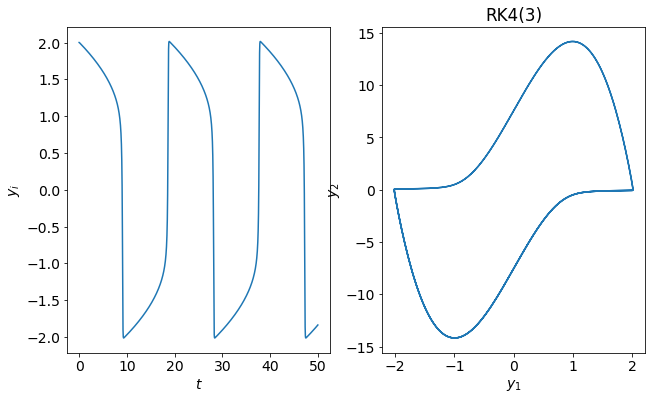

In [4]:
ode.plot_vanderpol_oszillator(10,50)

Für große $\mu = 10, $ wird das Problem extrem steif. Die BDF-2 und der adaptive Runge-Kutta-Verfahren 4(3) können zu lösen.

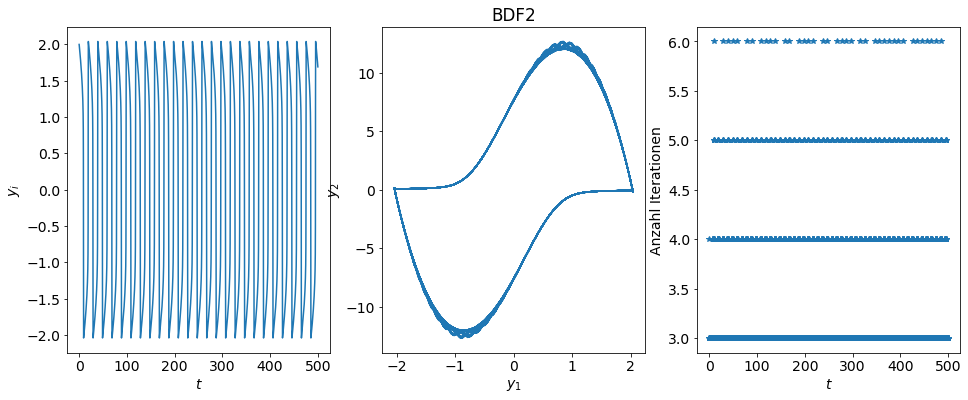

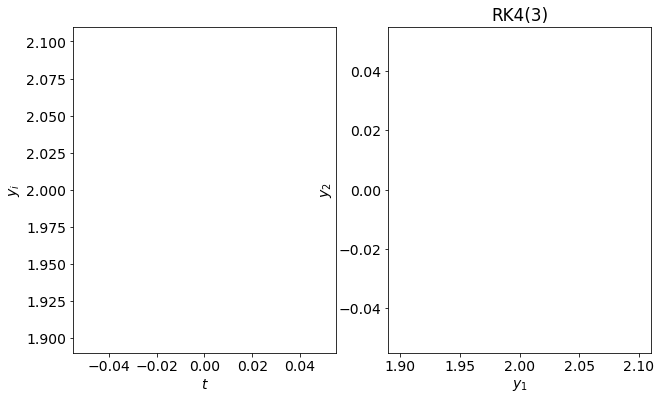

In [5]:
ode.plot_vanderpol_oszillator(10,500)

Bei $\mu=10$ ist der DGl sehr steif. Die BDF2 hat Mühe die DGL zu berechnen. igentlich wäre ein implizites Lösungsverfahren mit adaptiver Schrittweitensteuerung am Besten geeignet. Das explizite Runge-Kutta-Verfahren stöst an seine Grenze und kann nicht berechnen. 

Quellen:

[1] Numerische Mathematik, Teubner Verlag 2006. Hans Rudolf Schwarz, Norbert Köckler.
